# Análisis de datos sobre películas

## Introducción

En esta práctica vamos a proponer el análisis de datos sobre 45.000 películas que se incluyen en el Full MovieLens Dataset.

El objetivo de esta práctica es que afiancéis los conocimientos adquiridos así como fomentar que consultéis la documentación en línea tanto de `Pandas` como de `Seaborn`. De este modo podréis familiarizaros más con los diferentes métodos disponibles para resolver los ejercicios propuestos. En cada pregunta, se ofrecen consejos sobre partes relevantes de esta documentación relacionadas con las tareas que se piden.


## Entrega

El plazo de entrega de esta práctica finalizará el próximo **domingo 24 de Noviembre de 2019**.
La entrega se realizará a través de la plataforma.

## Descripción de los datos

El archivo de datos que vamos a utilizar puede obtenerse de [esta url](https://www.kaggle.com/rounakbanik/the-movies-dataset#movies_metadata.csv). Se trata de un fichero en formato CSV, que contiene información sobre 45.000 películas incluidas en el Full MovieLens Dataset. El fichero cuenta con las siguientes columnas:

* *adults*: indica si la película pertenece a la categoría de adultos.
* *belongs_to_collection*: indica si la película pertenece a una saga.
* *budget*: presupuesto de la película
* *genres*: género de la película.
* *homepage*: página web oficial de la película.
* *id*: identificador de la película.
* *imdb_id*: identificador de la entrada de la base de datos donde están las películas.
* *original_language*: lengua original de la película.
* *original_title*: título en el idioma original.
* *overview*: resumen del contenido de la película.
* *popularity*: popularidad.
* *poster_path*: ruta para la imagen del poster de la película en la web original.
* *production_companies*: compañías que han perticipado en la producción.
* *production_countries*: paises que han participado en la producción.
* *release_date*: fecha en estreno.
* *revenue*: ingresos de taquilla que ha obtenido la película.
* *runtime*: duración de la película (en minutos).
* *spoken_languages*: idiomas que se hablan en la película.
* *status*: released (se ha estrenado) o rumored (todavía no se ha estrenado).
* *tagline*: línea de etiquetas con información adicional de la película.
* *title*: título de la película en inglés.
* *video*: indica si ha sido lanzada en vídeo.
* *vote_average*: promedio de los votos.
* *vote_count*: número de personas que han votado sobre la película.


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Crea los gráficos en el propio notebook
%matplotlib inline

# Fichero del que se va a generar el dataframe
path = "/home/rober/Escritorio/Master_Data_Science/Asignaturas/Programacion_orientada_a_ciencia_de_datos/Practica_Python/the-movies-dataset/"
file = 'movies_metadata.csv'
file = path + file

## Preparación de datos para realizar los ejercicios:

En la practica se pide trabajar con sólo algunos de los campos del dataframe original:
Nombre, fecha estreno (semanas, años), ingresos, categoría, votos, duracion de la pelicula, presupuesto.

In [9]:
#---------------------------------------------------------------------------------------------
#   0 - PREPARACION DE DATOS
#---------------------------------------------------------------------------------------------


# Creamos un dataframe solo con las columnas que vamos a utilizar en los ejercicios
interesting_columns = ['original_title', 'genres', 'release_date', 'budget', 'revenue', 'runtime', 'vote_count', 'vote_average']
df = pd.read_csv(file, delimiter=',', usecols=interesting_columns)
#df.describe()

# Reorganizamos las columnas en el orden deseado
df.reindex(columns=['original_title', 'release_date', 'budget', 'revenue', 'runtime', 'vote_count', 'vote_average'])

# Revisamos el tipo de dato que pandas ha asignado a cada serie
columns = df.columns
for column in columns:
    print(column, ": ", df[column][0], " ==> ", type(df[column][0]))


budget :  30000000  ==>  <class 'str'>
genres :  [{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]  ==>  <class 'str'>
original_title :  Toy Story  ==>  <class 'str'>
release_date :  1995-10-30  ==>  <class 'str'>
revenue :  373554033.0  ==>  <class 'numpy.float64'>
runtime :  81.0  ==>  <class 'numpy.float64'>
vote_average :  7.7  ==>  <class 'numpy.float64'>
vote_count :  5415.0  ==>  <class 'numpy.float64'>


#### IMPORTANTE:
Observamos que para cumplir los propositos de los ejercicios debemos convertir las siguientes series:

A - Serie 'budget' --> hay que convertir a valores numericos enteros (ahora son string)

B - Serie 'genres' --> habrá que extraer los géneros a los que pertenece cada pelicula

C - Serie 'release_date' --> convertir a date time y extraer de la fecha de cada película, semana y año

 A) Convertir serie 'budget' en enteros

In [10]:
n_rows = df.shape[0]
budgets_converted = list()
for i in range(n_rows):
    original_value = df['budget'][i]
    try:
        converted_value = int(original_value)
    except:
        converted_value = 0
    budgets_converted.append(converted_value)

# Actualizamos el contenido del dataframe con la serie 'budget' en formato correcto
df['budget'] = budgets_converted

B) Convertir serie 'genres'

In [11]:
# Se observa que cada celda de 'genres' debe ser preprocesada. Una pelicula puede pertenecer a varios generos
# Hay que extraer de cada pelicula los generos a los que pertenece

print("Primeras 3 filas de columna 'genres' tal y como se importan\n", df['genres'][:3])

# Definimos una función que parsee el contenido de cada celda y extraiga los generos. Los devuelve dentro de una lista
def get_genres(str_input):
    try:
        # Eliminamos corchetes
        str_input = str_input.replace("[", "")
        str_input = str_input.replace("}]", "")
        # Extraemos los diccionarios que están separados por ','
        generos = str_input.split('}, ')
        output = []
        for genero in generos:
            out = genero.split(': ')[-1]
            out = out.replace("'", "")
            output.append(out)
    except:
        output = []
    return output

# Obtenemos los generos a los que pertenece cada pelicula
film_genres = []
for film_info in df['genres']:
    genres= get_genres(film_info)
    film_genres.append(genres)

# Reemplazamos en el dataframe la columna de generos una vez limpiada
df['genres'] = film_genres

# Resultado de la conversión
print("\nResultado de la conversión\n", df['genres'][:3])

Primeras 3 filas de columna 'genres' tal y como se importan
 0    [{'id': 16, 'name': 'Animation'}, {'id': 35, '...
1    [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...
2    [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...
Name: genres, dtype: object

Resultado de la conversión
 0     [Animation, Comedy, Family]
1    [Adventure, Fantasy, Family]
2               [Romance, Comedy]
Name: genres, dtype: object


C) Convertir 'release_date' a timestamp y extraer semana y año

In [12]:
df['release_date'] = pd.to_datetime(df['release_date'], format='%Y-%m-%d', errors='coerce')
print("Fecha convertida a formato:\n", type(df['release_date'][0]))
df['date_week'] = df['release_date'].dt.week
df['date_year'] = df['release_date'].dt.year

print("\nResultado de la conversión:\n", df.loc[0, ['release_date', 'date_week', 'date_year']])


Fecha convertida a formato:
 <class 'pandas._libs.tslibs.timestamps.Timestamp'>

Resultado de la conversión:
 release_date    1995-10-30 00:00:00
date_week                        44
date_year                      1995
Name: 0, dtype: object


## Ejercicio 1
#### Valor: 20 puntos

Representa mediante Pandas y Seaborn el número de estrenos que se han producido por semana. ¿Se observa algún tipo de comportamiento?

**Consejo**: Con el fin de poder agrupar la información por semanas, una forma cómoda de trabajar es mediante los índices temporales. 

Text(0.5, 1.0, 'Total de peliculas estrenadas por semana.\nDatos desde año 1874 hasta 2020')

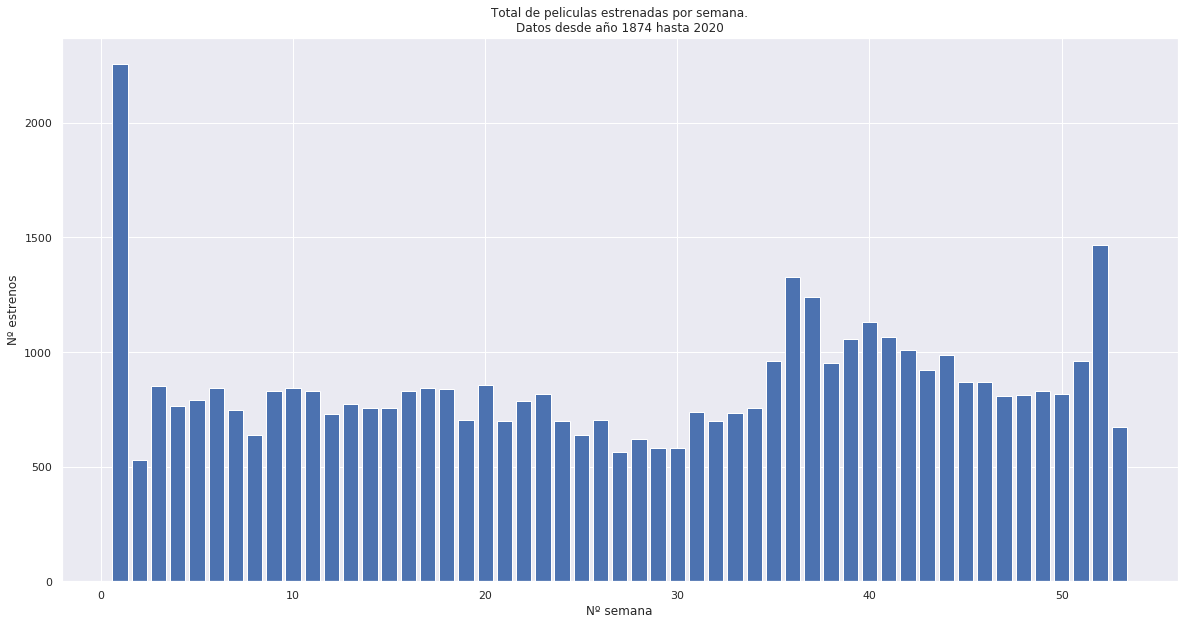

In [13]:
#---------------------------------------------------------------------------------------------
#   RESOLUCIÓN EJERCICIO 1
#---------------------------------------------------------------------------------------------

# Obtengo el numero de estrenos por semana
estrenos_semana = df['date_week'].value_counts()
# extraigo los distintos numeros de semanas
weeks = estrenos_semana.index
# Obtengo los indices que ordenan en orden ascendente las semanas
ids_sort = weeks.argsort()
weeks_srt = weeks[ids_sort]
n_estrenos_semana = estrenos_semana.values[ids_sort]

# Mostramos grafico
sns.set(rc={"figure.figsize": (20, 10)})
plt.figure()
plt.bar(weeks_srt, n_estrenos_semana)
plt.xlabel("Nº semana")
plt.ylabel("Nº estrenos")
plt.title("Total de peliculas estrenadas por semana.\nDatos desde año {} hasta {}".format(int(df.date_year.min()), int(df.date_year.max())))

#### CONCLUSIÓN: la mayoría de películas se estrenan en las semanas 1 (primera de Enero), 6, 31(inicio de Septiembre) y 52 (inicio de Navidades)

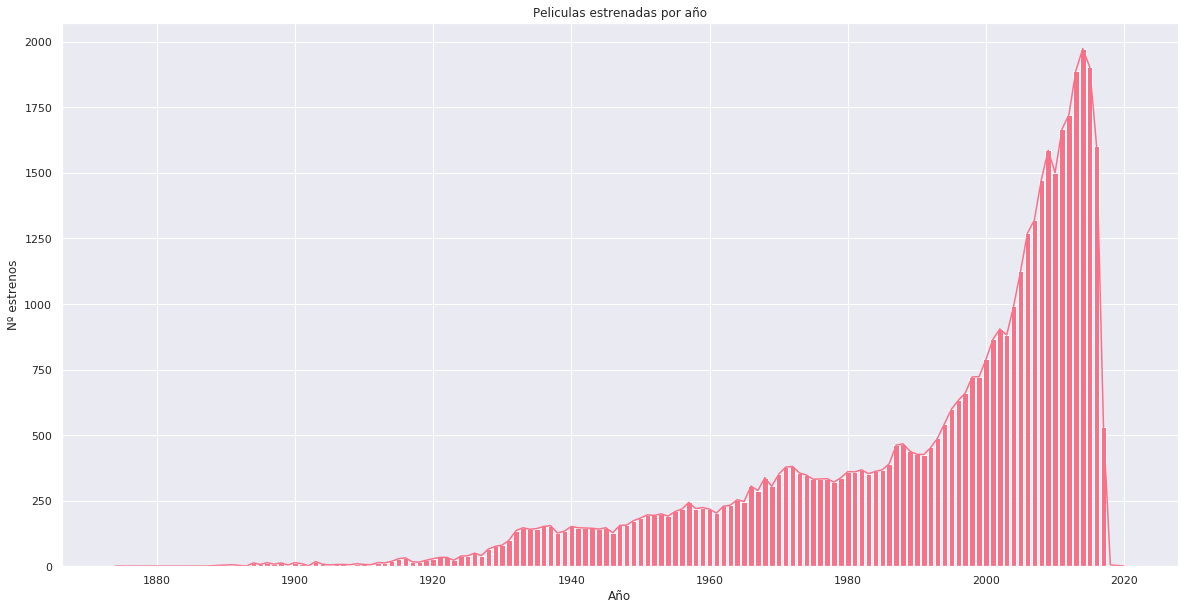

In [14]:
#---------------------------------------------------------------------------------------------
#   RESOLUCIÓN EXTRA
#---------------------------------------------------------------------------------------------

# Adicionalmente se muestra el numero de peliculas estrenadas por año. Por ser una información que podría
# ser interesante
pelis_año = df['date_year'].value_counts()
ids_sort = pelis_año.index.argsort()
años_srt = pelis_año.index[ids_sort]
pelis_año_srt = pelis_año.values[ids_sort]
with sns.color_palette("husl"):
    plt.figure()
    plt.bar(años_srt, pelis_año_srt)
    plt.xlabel("Año")
    plt.ylabel("Nº estrenos")
    plt.title("Peliculas estrenadas por año")
    plt.plot(años_srt, pelis_año_srt)

#### CONCLUSIÓN extra: se observa que historicamente el nº de peliculas estrenadas por año ha ido en aumento, de forma practicamente exponencial hasta 2014, donde se produce un cambio de tendencia; posiblemente debido a la popularización de plataformas de contenidos audiovisuales online

## Ejercicio 2
#### Valor: 25 puntos

¿Existe alguna relación entre los ingresos que se han obtenidos por las películas y la época del año en la que se estrenaron? 

Resumen de información descartada al limpiar los datos
            date_week       revenue
count  38074.000000  38158.000000
mean      27.393733      0.065334
std       16.177341      1.875394
min        1.000000      0.000000
25%       13.000000      0.000000
50%       29.000000      0.000000
75%       41.000000      0.000000
max       53.000000    100.000000
Quantile 99.99 de los datos descartados:  88.7


[Text(0, 0.5, 'Nº peliculas estrenadas'), Text(0.5, 0, 'Nº semana')]

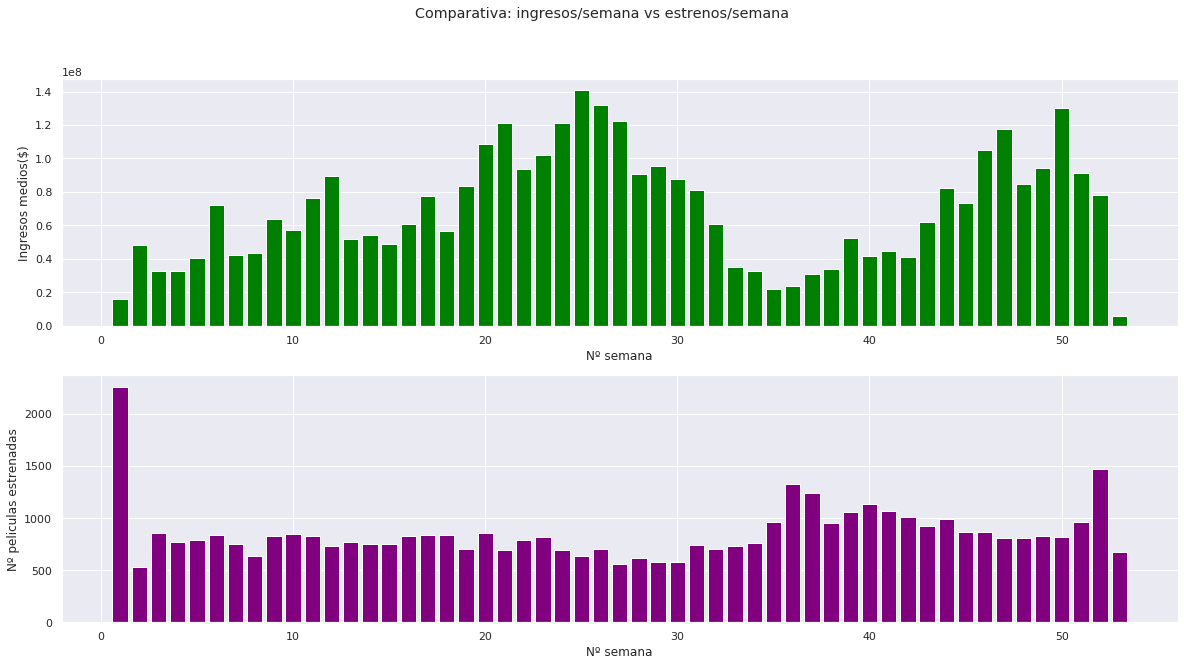

In [15]:
#---------------------------------------------------------------------------------------------
#   RESOLUCIÓN EJERCICIO 2
#---------------------------------------------------------------------------------------------

# Calculamos el valor medio de ingresos por semana, teniendo en cuenta todas las peliculas estrenadas en cada semana

df['revenue'].describe()
# Se observa una desviación estandar altísima y que el hasta el quartil q75 el valor es cero --> Se detecta anomalía
# Inspeccionamos los valores contenidos en la serie df.revenue. Mostrando los 20 valores mas repetidos
conteo = df['revenue'].value_counts()
# print(conteo.iloc[:20])

# Observamos gran cantidad de valores 0 y algunos casi iguales: 1, 3
# Eliminamos todos los valores menores que 100$ y recalculamos los cuartiles
revenue_clean = df.loc[df.revenue > 100, ['date_week', 'revenue']]
# print("Resumen de información limpiada\n ", revenue_clean.describe())
# print(revenue_clean.revenue.value_counts())

# Los datos han mejorado claramente. Estudiamos que hemos descartado
revenue_discarded = df.loc[df.revenue <= 100, ['date_week', 'revenue']]
print("Resumen de información descartada al limpiar los datos\n ", revenue_discarded.describe())
print("Quantile 99.99 de los datos descartados: ", round(revenue_discarded.revenue.quantile(0.9999), 1))
# --> Observamos que apenas hay valores distintos de cero por debajo de 100$

# Una vez limpiados los datos (revenue_clean) calculamos el promedio de ingresos por semanas
# Calculamos el promedio semanal
semanas = []
ingresos = []
for week in weeks_srt:
    # Por cada semana calculo la media
    mean_income_week = revenue_clean.loc[df['date_week'] == week, 'revenue'].mean()
    semanas.append(week)
    ingresos.append(mean_income_week)
    #print("Semana: {} --> ingresos: {}$".format(int(week),int(mean_income_week)))


# Pintamos conjuntamente ingresos/semana y estrenos/semana para poder obtener conclusiones
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.suptitle("Comparativa: ingresos/semana vs estrenos/semana")
ax1.bar(semanas, ingresos, color="green")
ax1.set(xlabel="Nº semana", ylabel="Ingresos medios($)")

ax2.bar(weeks_srt, n_estrenos_semana, color="purple")
ax2.set(xlabel="Nº semana", ylabel="Nº peliculas estrenadas")

#### CONLCUSIÓN: Sorprendentemente, los mayores ingresos no se registran cuando se estrenan la mayoría de películas sino en las semanas 20-25 (durante Mayo) y durante las 5 semanas anteriores a navidades

## Ejercicio 3
#### Valor: 25 puntos

Escoja un diagrama adecuado para representar una comparación entre los votos que ha recibido una película y la categoría a la que pertenece. ¿A qué conclusiones podemos llegar?

**Consejo**: Revisa la documentación de Seaborn sobre [representación gráfica con datos categóricos](http://seaborn.pydata.org/tutorial/categorical.html#categorical-tutorial) para resolver el ejercicio.

#### IMPORTANTE: aunque los datos están más limpios, no estan suficientemente bien ordenados como para trabajar con ellos vamos a generar variables dummy

In [16]:
#---------------------------------------------------------------------------------------------
#   PREPARACIÓN DATOS EJERCICIO 3
#---------------------------------------------------------------------------------------------

# Buscamos todos los tipos de generos que hay, para ello:
# Generamos una lista con todos los generos de todas las peliculas
lista_generos = []
for celda in df['genres']:
    for genero in celda:
        # eliminamos valores numericos que se cuelan en los datos
        try:
            # si se puede convertir en valor numerico entonces no me vale
            int(genero)
        except:
            # si no se puede convertir en valor numerico --> es un nombre; a priori valido
            lista_generos.append(genero)


# Convertimos dicha lista en un set <--> unique
lista_generos = set(lista_generos)
#print(lista_generos)

# Eliminamos contenido incorrecto obteniendo la lista de generos
lista_generos = list(lista_generos)
#print("Valor no deseado encontrado: '{}', lo borramos".format(lista_generos[3]))
id_borrar = lista_generos.index(']')
del(lista_generos[id_borrar])
#print(lista_generos)


# Generamos un np array vacío donde guardamos las categorias de cada pelicula
n_generos = len(lista_generos)
n_films = len(df['genres'])
outputs = np.zeros([n_films, n_generos], dtype=int)

# Localizamos los generos a los que pertenece cada pelicula y los guardamos en una matriz numerica
for i in range(n_films):
    positions = []
    generos_pelicula = df['genres'][i]
    for genero in generos_pelicula:
        if genero in lista_generos:
            pos = lista_generos.index(genero)
            positions.append(pos)

    # Ponemos a 1 las columnas donde haya habido coincidencias
    if len(positions) >= 1:
        outputs[i, positions] = 1


# Creamos un nuevo dataframe con los identificadores de los generos a los que pertenece cada pelicula
df_categories = pd.DataFrame(outputs, columns=lista_generos)
# Añadimos a este dataframe: titulo pelicula, recuento de votos y nota media
df_categories['original_title'] = df['original_title']
df_categories['vote_count'] = df['vote_count']
df_categories['vote_average'] = df['vote_average']

# reorganizamos el dataframe al gusto
lista_orden = ['original_title', 'vote_count','vote_average']
lista_orden = lista_orden + lista_generos
df_categories = df_categories.reindex(columns=lista_orden)

# Datos listos para trabajar
df_categories.head(5)

,original_title,vote_count,vote_average,Romance,Foreign,Mystery,TV Movie,Animation,Family,Western,...,Crime,History,Documentary,Thriller,Horror,Drama,Comedy,Adventure,Fantasy,Action
0,Toy Story,5415.0,7.7,0,0,0,0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
1,Jumanji,2413.0,6.9,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
2,Grumpier Old Men,92.0,6.5,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,Waiting to Exhale,34.0,6.1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
4,Father of the Bride Part II,173.0,5.7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


Tras haber preparado los datos, procedemos a la resolucion del ejercicio

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text xticklabel objects>)

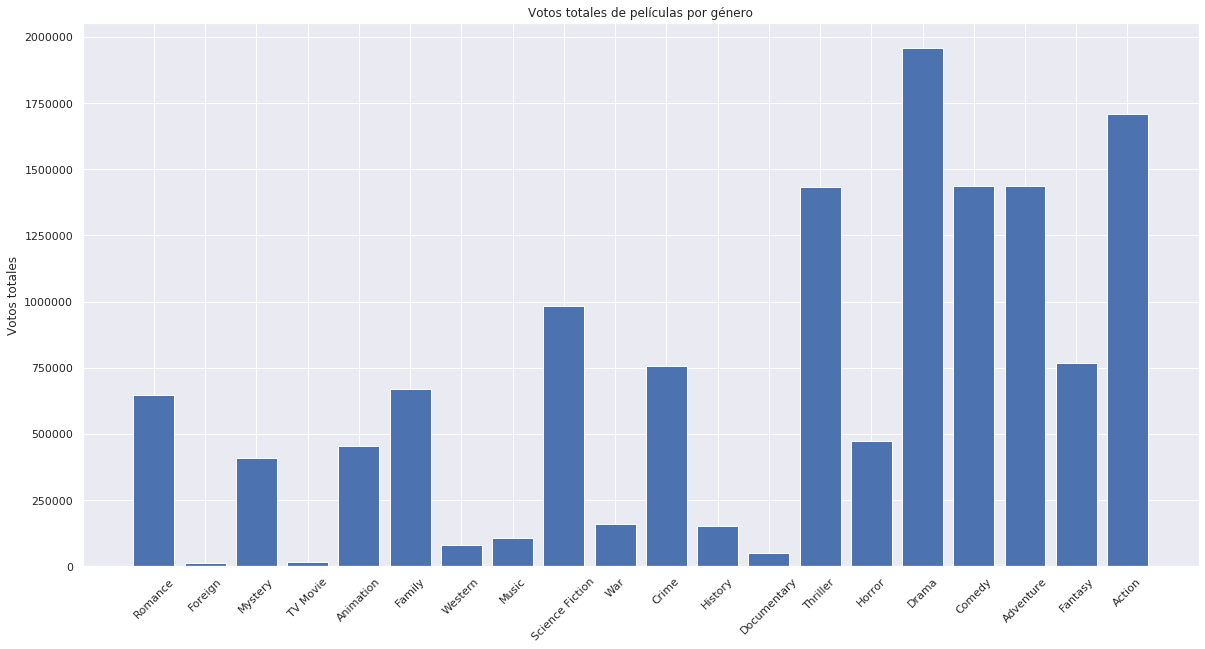

In [17]:
#---------------------------------------------------------------------------------------------
#   RESOLUCIÓN EJERCICIO 3
#---------------------------------------------------------------------------------------------

# Sumamos el numero de votos por tipo de pelicula
df_votos = pd.DataFrame(index=['total_votos', 'promedio_votos', 'nota_media'])
for genero in lista_generos:
    total_votos =  df_categories.loc[df_categories[genero] == 1, 'vote_count'].sum()
    promedio_votos =  df_categories.loc[(df_categories[genero] == 1) & (df_categories['vote_count'] > 0), 'vote_count'].mean()
    promedio_nota =  df_categories.loc[(df_categories[genero] == 1) & (df_categories['vote_average'] > 0), 'vote_average'].mean()
    df_votos[genero] = [total_votos, promedio_votos, promedio_nota]

# Pintamos el numero total y el promedio de votos por tipo de pelicula
plt.figure()
plt.bar(df_votos.columns, df_votos.loc['total_votos', :])
plt.ylabel("Votos totales")
plt.title("Votos totales de películas por género")
plt.xticks(rotation=45)

#### CONLCUSION: los generos más votados son drama y acción

## Ejercicio 4
#### Valor: 30 puntos

Escoja un diagrama adecuado para representar una posible relación entre la duración de las películas y su presupuesto desglosado por año. ¿Se puede observar alguna correlación entre ambas variables? ¿Puedes buscar una métrica de correlación adecuada para cuantificar la relación entre ambas variables? ¿Se ha producido algún cambio significativo en algún periodo?

**Consejo**: Puede resultar útil realizar el desglose por años en diferentes gráficas.

[Text(0, 0.5, 'Presupuesto ($)'),
 Text(0.5, 0, 'Duración (min)'),
 Text(0.5, 1.0, 'Año 2015')]

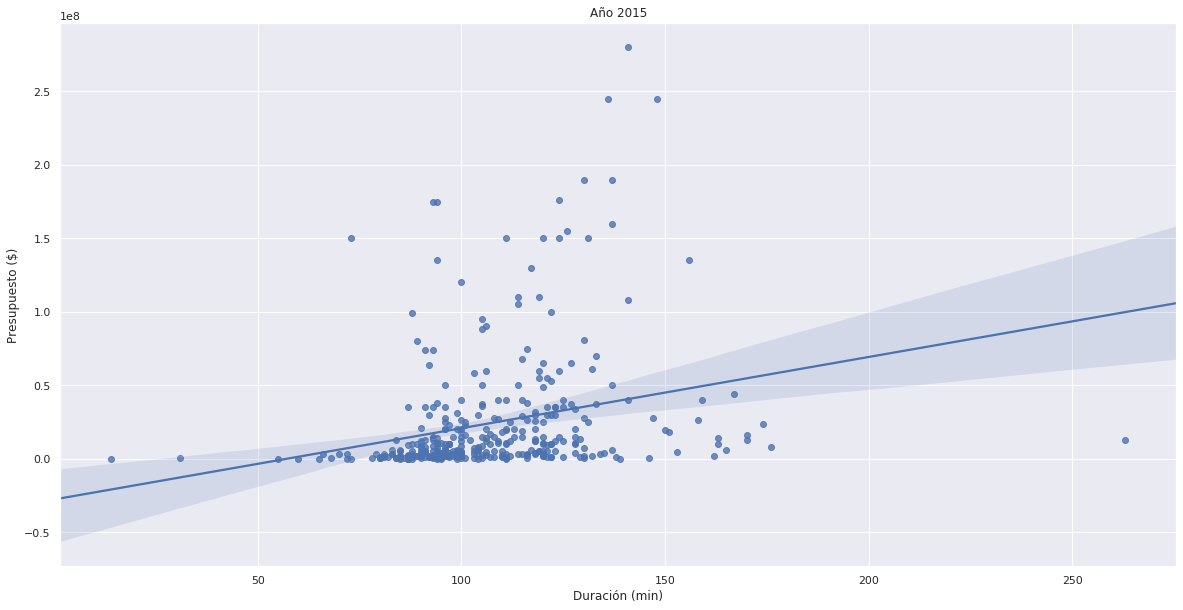

In [18]:
#---------------------------------------------------------------------------------------------
#   RESOLUCIÓN EJERCICIO 4 - Primera parte
#---------------------------------------------------------------------------------------------

# pintamos todas las peliculas vs duración del año con mayor numero de peliculas estrenadas: 2015
df2015 = df.loc[(df['date_year'] == 2015) & (df['budget'] > 100), ['runtime', 'budget']]

plt.figure()
ax = sns.regplot(df2015['runtime'], df2015['budget'])
ax.set(xlabel="Duración (min)", ylabel="Presupuesto ($)", title="Año 2015")


#### Se ha utilizado el año 2015 por disponer de mayor numero de muestras considerandose representativo de la población. No se observa una relación entre ambas variables para el año 2015. Vamos a calcular la correlación entre estas variables para todos los años (toda la población) para corroborar esta hipótesis

[Text(0, 0.5, 'Correlation value'),
 Text(0.5, 0, 'Year'),
 Text(0.5, 1.0, 'Historic correlations: runtime vs budget')]

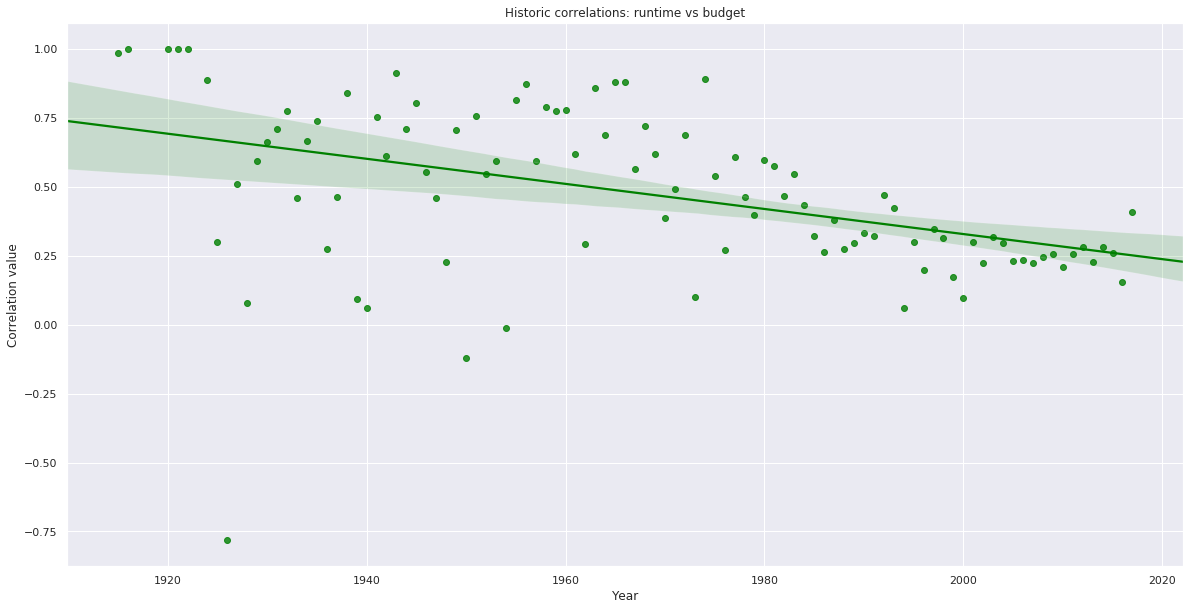

In [19]:
# Hacemos el mismo proceso que para el año 2015 en todos los años y guardamos el valor de correlacion
# guardamos en una lista todos los años de los que se dispone información
years = df.loc[df['date_year'] > 0, 'date_year']
years = set(years)
years = list(years)
correlations = list()

for year in years:
    df_temp = df.loc[(df['date_year'] == year) & (df['budget'] > 100), ['runtime', 'budget']]
    corr = df_temp.corr()
    corr = corr.iloc[0, 1]
    correlations.append(corr)

   
# pintamos las correlaciones vs los años
plt.figure()
ax = sns.regplot(years, correlations, color="green")
ax.set(xlabel= "Year", ylabel= "Correlation value", title= "Historic correlations: runtime vs budget")


#### CONCLUSIÓN: hasta 1924 la duración de las películas estaba altamente correlada con su presupuesto. A medida que han pasado los años esta correlación ha disminuido hasta niveles en los que se puede afirmar que desde 1985 de forma generalizada el presupuesto de una pelicula y su duración no están correlados

